In [2]:
import geopandas
import geopandas as gpd

In [4]:
from shapely.geometry import Polygon, LineString, MultiLineString
polys1 = gpd.GeoSeries([
    Polygon([(0, 0), (2, 0), (2, 2), (0, 2)]),
    Polygon([(2, 2), (4, 2), (4, 4), (2, 4)]),
    Polygon([(1, 1), (3, 1), (3, 3), (1, 3)]),
    Polygon([(4, 4), (6, 4), (6, 6), (4, 6)])
])
polys2 = geopandas.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                              Polygon([(3,3), (5,3), (5,5), (3,5)])])

# convert linestring_1 into multiLineString
linestrings_1 = geopandas.GeoSeries([LineString([(0, 0), (1, 1), (0, 2)]), LineString([(2, 0), (3, 2), (2, 4)])])

linestrings_1 = gpd.GeoSeries([
    LineString([(0, 0), (1, 1), (0, 2)]),
    LineString([(2, 0), (3, 2), (2, 4)]),
    LineString([(1, 1), (2, 2), (1, 2)]),
    LineString([(3, 0), (4, 1), (3, 1)]),
    LineString([(1, 0), (2, 1), (1, 1)]),
    LineString([(2, 2), (3, 3), (2, 3)])
])

# Create a MultiLineString from the LineString geometries
multilinestring = MultiLineString(list(linestrings_1))

# Create a GeoSeries with the MultiLineString
multilinestring_series = gpd.GeoSeries([multilinestring])

# Create a GeoDataFrame (optional, if needed)
multilinestring_gdf = gpd.GeoDataFrame(geometry=multilinestring_series)

                                   
df1 = geopandas.GeoDataFrame({'geometry': polys1})
df2 = geopandas.GeoDataFrame({'geometry': polys2, 'df2_data':[1,2]})
# df3 = geopandas.GeoDataFrame({'geometry': linestrings_1_buffered})

<Axes: >

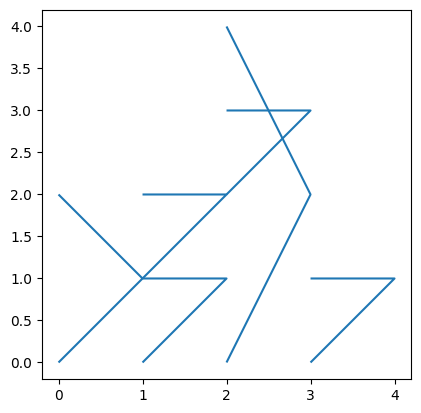

In [5]:
multilinestring_gdf.plot()

<Axes: >

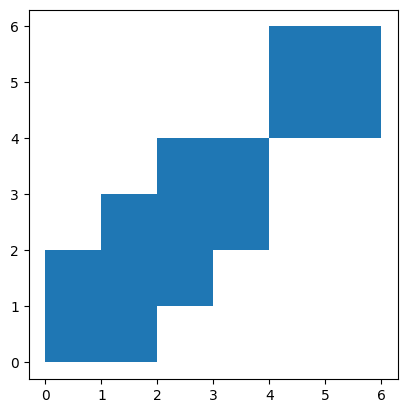

In [6]:
df1.plot()

In [14]:
type(multilinestring)

shapely.geometry.multilinestring.MultiLineString

In [11]:
# Initialize the "keep" column with False for all rows
df1["keep"] = False

# Iterate through each polygon in df1 using itertuples
for row in df1.itertuples(index=True):
    if multilinestring.intersects(row.geometry):
        # Set the "keep" value to True for intersecting polygons
        df1.at[row.Index, "keep"] = True

# Now df1 contains the "keep" column with True/False values

In [12]:
df1.explore()

In [138]:
df1["keep"] = df1.intersects(multilinestring_gdf)

C:\Users\Gergo Gyori\AppData\Local\Temp\ipykernel_31276\3337400650.py:1: UserWarning: The indices of the two GeoSeries are different.
  df1["keep"] = df1.intersects(multilinestring_gdf)


In [103]:
multilinestring_gdf.crosses(df1, align=True)

C:\Users\Gergo Gyori\AppData\Local\Temp\ipykernel_31276\1817816145.py:1: UserWarning: The indices of the two GeoSeries are different.
  multilinestring_gdf.crosses(df1, align=True)


0     True
1    False
dtype: bool

In [102]:
df1.crosses(multilinestring_gdf, align=True)

C:\Users\Gergo Gyori\AppData\Local\Temp\ipykernel_31276\1655452793.py:1: UserWarning: The indices of the two GeoSeries are different.
  df1.crosses(multilinestring_gdf, align=True)


0     True
1    False
dtype: bool

In [106]:
multilinestring_gdf.touches(df1)

C:\Users\Gergo Gyori\AppData\Local\Temp\ipykernel_31276\1632536349.py:1: UserWarning: The indices of the two GeoSeries are different.
  multilinestring_gdf.touches(df1)


0    False
1    False
dtype: bool

In [107]:
df1.covered_by(multilinestring_gdf)

C:\Users\Gergo Gyori\AppData\Local\Temp\ipykernel_31276\4097870066.py:1: UserWarning: The indices of the two GeoSeries are different.
  df1.covered_by(multilinestring_gdf)


0    False
1    False
dtype: bool

<Axes: >

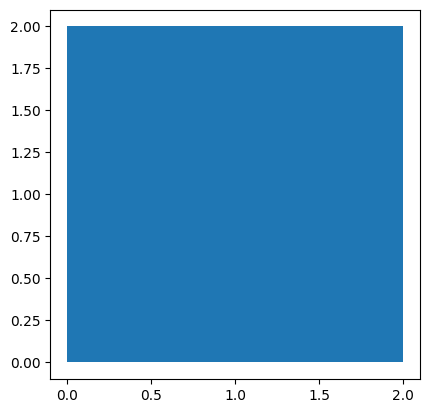

In [79]:
df1[df1["keep"] == True].plot() 

<Axes: >

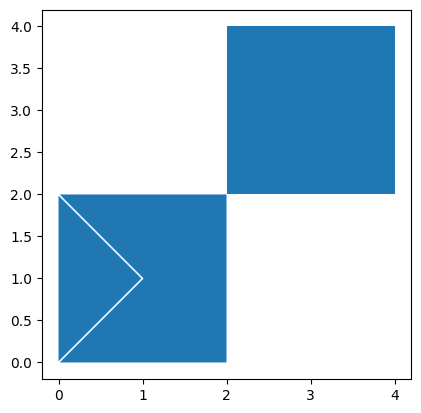

In [62]:
df_3 = geopandas.overlay(df1, df3, how='difference')
df_3.plot()